In [1]:
from Functions import*


In [2]:
from statistics import *

In [3]:
test_list_covid, train_list_covid,val_list_covid=create_list_to_load(covid=True)

test_list_Noncovid, train_list_Noncovid,val_list_Noncovid=create_list_to_load(covid=False)

In [4]:
test_covid_labels=create_list_labels(test_list_covid,covid=True)
train_covid_labels=create_list_labels(train_list_covid,covid=True)
val_covid_labels=create_list_labels(val_list_covid,covid=True)

test_Noncovid_labels=create_list_labels(test_list_Noncovid,covid=False)
train_Noncovid_labels=create_list_labels(train_list_Noncovid,covid=False)
val_Noncovid_labels=create_list_labels(val_list_Noncovid,covid=False)

In [5]:
test_list,test_labels=concatenate_lists_and_labels(test_list_covid,test_covid_labels,test_list_Noncovid,test_Noncovid_labels)
train_list,train_labels=concatenate_lists_and_labels(train_list_covid,train_covid_labels,train_list_Noncovid,train_Noncovid_labels)
val_list,val_labels=concatenate_lists_and_labels(val_list_covid,val_covid_labels,val_list_Noncovid,val_Noncovid_labels)

In [6]:
test_list,test_labels=shuffle_lists(test_list, test_labels)
train_list,train_labels=shuffle_lists(train_list, train_labels)
val_list,val_labels=shuffle_lists(val_list, val_labels)




In [7]:
total_list=test_list+train_list+val_list
total_labels=test_labels+train_labels+val_labels

In [8]:
total_list,total_labels=shuffle_lists(total_list, total_labels)

train_percent=0.8
length = len(total_list)
train_length = int(length*train_percent)

train_set=total_list[0:train_length]
train_labels=total_labels[0:train_length]
val_set=total_list[:train_length]
val_labels=total_labels[:train_length]

In [9]:
#the article precises the size of the images as (480,480)

img_w,img_h,img_ch=480,480,1


train_set=load_data(train_set,img_w,img_h,img_ch)
val_set=load_data(val_set,img_w,img_h,img_ch)


train_labels=np.array(train_labels)
val_labels=np.array(val_labels)


In [10]:
from skimage.io import imshow

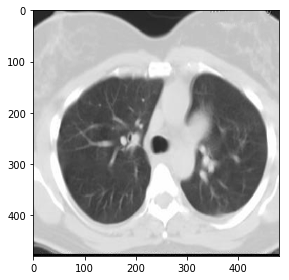

In [11]:
imshow(np.squeeze(train_set[0]),cmap='gray')

In [12]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [13]:
INPUT_SHAPE=480,480,1
N_CLASSES=1

K.clear_session()
my_model=Alex_model(1,480,480)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 480, 8)       80        
_________________________________________________________________
activation (Activation)      (None, 480, 480, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 16)      1168      
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      4

In [14]:
learning_rate=0.0001
optimizer=Adam(learning_rate)
batch_size=16
loss_function = 'binary_crossentropy'
metrics=['binary_accuracy',precision,recall]
n_epochs=100

In [15]:
#data augmentation
dictionary_augmentation = dict(
                     rotation_range=10,
                     width_shift_range=0.1,     
                     horizontal_flip=True,
                     brightness_range=[0,2])


In [16]:
 STEP_SIZE_TRAIN=len(train_set)//batch_size

In [17]:
train_generator=augmentation(train_set,train_labels,dictionary_augmentation,batch_size)

In [18]:
my_model.compile(loss=loss_function,optimizer = optimizer,metrics=['binary_accuracy'])

In [19]:
model_hist=my_model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=(val_set,val_labels)
                        ,epochs=n_epochs,verbose=1)

Epoch 1/100
37/37 [==============================] - 6s 169ms/step - loss: 4.2923 - binary_accuracy: 0.5121 - val_loss: 0.6929 - val_binary_accuracy: 0.6309
Epoch 2/100
37/37 [==============================] - 6s 164ms/step - loss: 0.7093 - binary_accuracy: 0.5431 - val_loss: 0.6930 - val_binary_accuracy: 0.6007
Epoch 3/100
37/37 [==============================] - 6s 158ms/step - loss: 0.6748 - binary_accuracy: 0.5534 - val_loss: 0.6932 - val_binary_accuracy: 0.4614
Epoch 4/100
37/37 [==============================] - 6s 155ms/step - loss: 0.6765 - binary_accuracy: 0.5345 - val_loss: 0.6929 - val_binary_accuracy: 0.5436
Epoch 5/100
37/37 [==============================] - 6s 150ms/step - loss: 0.6754 - binary_accuracy: 0.5828 - val_loss: 0.6935 - val_binary_accuracy: 0.4815
Epoch 6/100
37/37 [==============================] - 5s 148ms/step - loss: 0.6798 - binary_accuracy: 0.5379 - val_loss: 0.6937 - val_binary_accuracy: 0.4614
Epoch 7/100
37/37 [==============================] - 5s 14

Epoch 53/100
37/37 [==============================] - 5s 147ms/step - loss: 0.5435 - binary_accuracy: 0.7130 - val_loss: 0.7032 - val_binary_accuracy: 0.5369
Epoch 54/100
37/37 [==============================] - 6s 149ms/step - loss: 0.5344 - binary_accuracy: 0.6741 - val_loss: 0.7210 - val_binary_accuracy: 0.5369
Epoch 55/100
37/37 [==============================] - 6s 152ms/step - loss: 0.5372 - binary_accuracy: 0.7128 - val_loss: 0.6851 - val_binary_accuracy: 0.5386
Epoch 56/100
37/37 [==============================] - 5s 147ms/step - loss: 0.4994 - binary_accuracy: 0.7482 - val_loss: 0.7196 - val_binary_accuracy: 0.5369
Epoch 57/100
37/37 [==============================] - 6s 154ms/step - loss: 0.5390 - binary_accuracy: 0.7365 - val_loss: 0.6988 - val_binary_accuracy: 0.5369
Epoch 58/100
37/37 [==============================] - 6s 152ms/step - loss: 0.5062 - binary_accuracy: 0.7328 - val_loss: 0.6923 - val_binary_accuracy: 0.5369
Epoch 59/100
37/37 [==============================] 

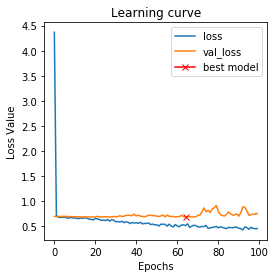

In [20]:
loss_curves_plot(model_hist)

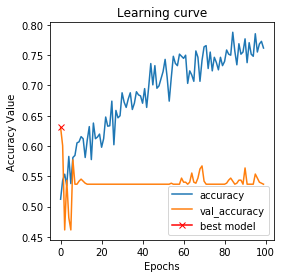

In [21]:
accuracy_curves_plot(model_hist,'binary_accuracy')

0


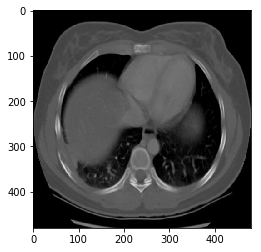

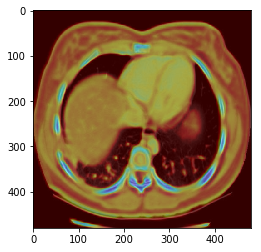

In [22]:
Sample = train_list[9]
Img = imread(Sample)
Img = Img[:,:,0]
Img = Img/255
Img = resize(Img, (img_h, img_w), anti_aliasing = True).astype('float32')
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
preds = my_model.predict(Img)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = my_model.output[:, class_idx]
last_conv_layer = my_model.get_layer("conv2d_4")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([my_model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([Img])
for i in range(16):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = cv2.imread(Sample)
img = cv2.resize(img, (480, 480), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(superimposed_img)